<a href="https://colab.research.google.com/github/adi-thyan03/project-code/blob/main/project_preprocesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/Real Estate Data V21.csv',on_bad_lines='skip')

In [ ]:
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [ ]:
df.shape


(14528, 9)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            14528 non-null  object
 1   Property Title  14528 non-null  object
 2   Price           14528 non-null  object
 3   Location        14528 non-null  object
 4   Total_Area      14528 non-null  int64 
 5   Price_per_SQFT  14528 non-null  int64 
 6   Description     14528 non-null  object
 7   Baths           14528 non-null  int64 
 8   Balcony         14528 non-null  object
dtypes: int64(3), object(6)
memory usage: 1021.6+ KB


In [ ]:
df.isna().sum()

,0
Name,0
Property Title,0
Price,0
Location,0
Total_Area,0
Price_per_SQFT,0
Description,0
Baths,0
Balcony,0


In [ ]:
df.describe()

,Total_Area,Price_per_SQFT,Baths
count,14528.000000,14528.000000,14528.000000
mean,1297.916988,11719.456222,2.751239
std,1245.694305,49036.068632,0.898243
min,70.000000,0.000000,1.000000
25%,650.000000,4480.000000,2.000000
50%,1000.000000,6050.000000,3.000000
75%,1439.000000,9312.500000,3.000000
max,35000.000000,999000.000000,6.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
num_cols = df[['Name' , 'Property Title','Price','Location','Total_Area','Price_per_SQFT','Description','Baths','Balcony']]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

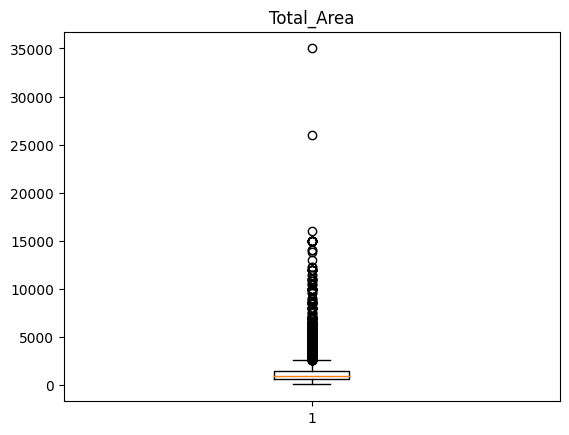

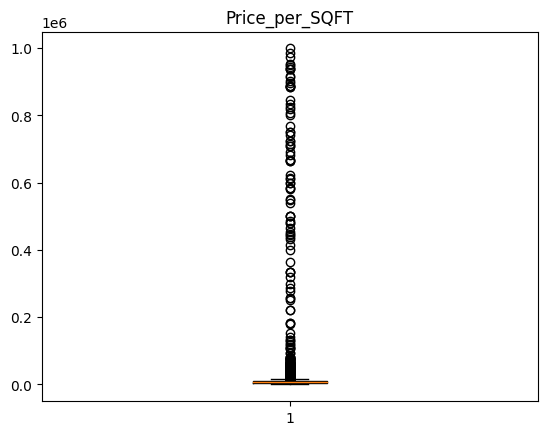

<Figure size 640x480 with 0 Axes>

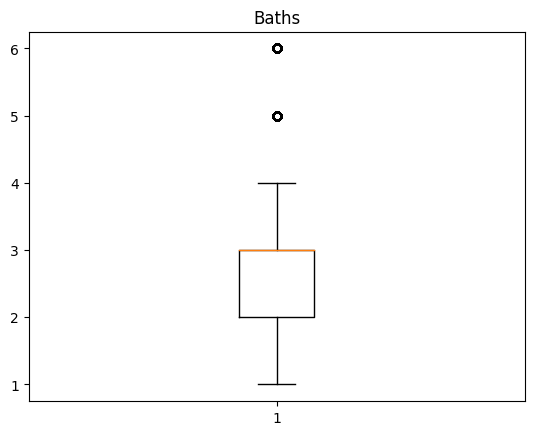

<Figure size 640x480 with 0 Axes>

In [ ]:
for col in num_cols:
  plt.figure()
  if pd.api.types.is_numeric_dtype(df[col]):
    plt.boxplot(df[col])
    plt.title(col)


In [ ]:
outlier_cols = ['Total_Area', 'Price_per_SQFT', 'Baths']

In [ ]:
# prompt: clip the outliers with lower and upper bound

for column in outlier_cols:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[column] = np.clip(df[column], lower_bound, upper_bound)

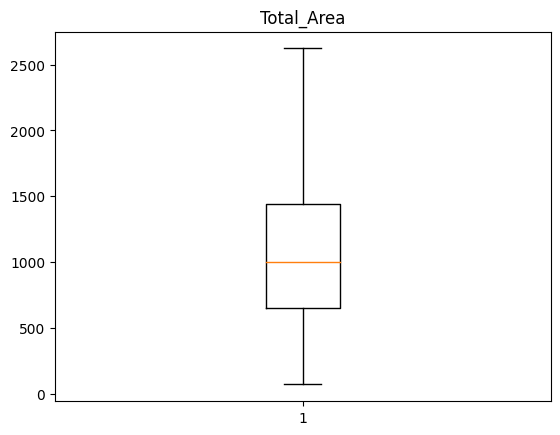

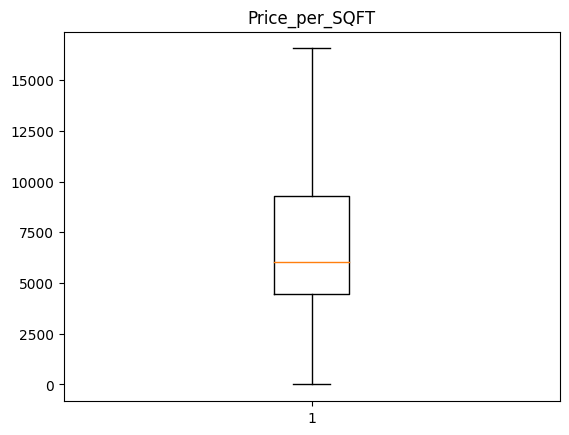

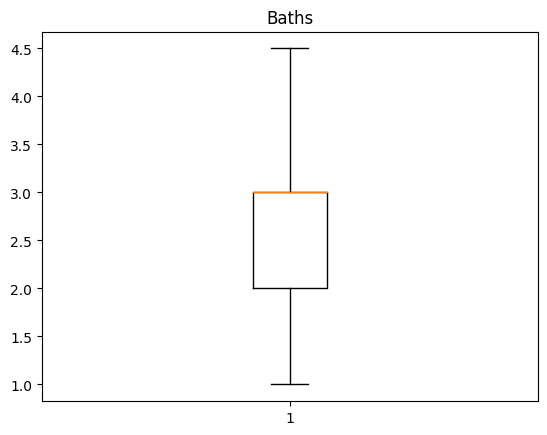

In [ ]:
for col in outlier_cols:
  plt.figure()
  if pd.api.types.is_numeric_dtype(df[col]):
    plt.boxplot(df[col])
    plt.title(col)

In [ ]:
from sklearn.preprocessing import StandardScaler



# Select numerical columns for scaling
numerical_cols = ['Total_Area', 'Price_per_SQFT']  # Replace with your numerical columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the numerical columns
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the scaled values
print(df_scaled.head())




                                      Name  \
0                         Casagrand ECR 14   
1    Ramanathan Nagar, Pozhichalur,Chennai   
2                              DAC Prapthi   
3  Naveenilaya,Chepauk, Triplicane,Chennai   
4                 VGN Spring Field Phase 1   

                                      Property Title     Price  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...  ₹1.99 Cr   
1  10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
2      3 BHK Flat for sale in West Tambaram, Chennai   ₹1.0 Cr   
3  7 BHK Independent House for sale in Triplicane...  ₹3.33 Cr   
4              2 BHK Flat for sale in Avadi, Chennai   ₹48.0 L   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai    2.184522        0.054298   
1     Ramanathan Nagar, Pozhichalur,Chennai    2.244917       -1.023382   
2  Kasthuribai Nagar, West Tambaram,Chennai    0.253388        0.025496   
3   Naveenilaya,Chepauk, T

In [ ]:
import re

# Function to convert price from 'Cr' or 'L' to numeric values
def convert_price(price_str):
    price_str = price_str.strip()  # Remove leading/trailing whitespace
    # Check if the price contains 'Cr' or 'L'
    if 'Cr' in price_str:
        price_str = price_str.replace('Cr', '').strip()  # Remove 'Cr'
        # Remove non-numeric characters and convert to float
        return float(re.sub(r'[^\d.]', '', price_str)) * 1e7  # 1 Cr = 10,000,000
    elif 'L' in price_str:
        price_str = price_str.replace('L', '').strip()

        return float(re.sub(r'[^\d.]', '', price_str)) * 1e5
    else:
        return None

df['Price_numeric'] = df['Price'].apply(convert_price)

print(df[['Price', 'Price_numeric']].head())




      Price  Price_numeric
0  ₹1.99 Cr     19900000.0
1  ₹2.25 Cr     22500000.0
2   ₹1.0 Cr     10000000.0
3  ₹3.33 Cr     33300000.0
4   ₹48.0 L      4800000.0


In [ ]:
df.describe()

,Total_Area,Price_per_SQFT,Baths,Price_numeric
count,14528.000000,14528.000000,14528.000000,1.452400e+04
mean,1297.916988,11719.456222,2.751239,1.067537e+07
std,1245.694305,49036.068632,0.898243,1.867507e+07
min,70.000000,0.000000,1.000000,1.000000e+05
25%,650.000000,4480.000000,2.000000,3.700000e+06
50%,1000.000000,6050.000000,3.000000,6.500000e+06
75%,1439.000000,9312.500000,3.000000,1.140000e+07
max,35000.000000,999000.000000,6.000000,8.400000e+08


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Select relevant features for training
features = ['Total_Area', 'Price_per_SQFT', 'Baths']
X = df[features]
y = df['Price_numeric']

# Handle missing values (if any)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display the coefficients of the model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error: 96533445144256.47
R-squared: 0.5075388405444234
Coefficients: [   13569.32296454     1673.13351609 -1608422.67484637]
Intercept: -13028618.662149431


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import re


# Select relevant features for training
features = ['Total_Area', 'Price_per_SQFT', 'Baths']
X = df[features]
y = df['Price_numeric']

# Handle missing values (if any)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature Importance
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)


Mean Squared Error: 174404504998330.88
R-squared: 0.11028302556273106
Feature Importance:
           Feature  Importance
1  Price_per_SQFT    0.531191
0      Total_Area    0.418931
2           Baths    0.049879


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model as a regressor
model = XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluate the model using appropriate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 336192889546439.44
R-squared: -0.7150733607336788


In [ ]:
pip install lightgbm


In [ ]:

import lightgbm as lgb
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize the model as a regressor
model = lgb.LGBMRegressor()

# Train the model
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Define a threshold for accuracy calculation (e.g., 10% error tolerance)
threshold = 0.1

# Calculate accuracy based on the threshold
y_pred_binary = np.where(np.abs(y_pred - y_test) / y_test <= threshold, 1, 0)
accuracy = accuracy_score(np.ones_like(y_test), y_pred_binary)

print(f'Accuracy (with threshold {threshold:.2f}): {accuracy * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 11622, number of used features: 3
[LightGBM] [Info] Start training from score 10765565.952160
Accuracy (with threshold 0.10): 73.92%


In [ ]:
# prompt: pickle file download

import pickle
from google.colab import files

# Assuming you have a variable named 'model' that you want to save

# Save the model to a file
with open('my_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Download the file
files.download('my_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
# Load the model from a pickle file
with open('/content/my_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
import numpy as np

# Ask the user to manually input the values
total_area = float(input("Enter the total area: "))
price_per_sqft = float(input("Enter the price per square foot: "))
baths = int(input("Enter the number of bathrooms: "))

# Organize the inputs into a 2D array (the model expects a 2D array for predictions)
# Assuming the model was trained with these three features
input_data = np.array([[total_area, price_per_sqft, baths]])

# Make predictions using the model
predictions = model.predict(input_data)

# Output the prediction result
print("Predicted Value:", predictions)


Enter the total area: 1400
Enter the price per square foot: 400
Enter the number of bathrooms: 2
Predicted Value: [26280671.31010306]
